In [93]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore

In [94]:
#lis le fichier erp
erp = pd.read_csv('erp.xlsx - Sheet1.csv')
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [95]:
#lis le fichier liaison

liaison = pd.read_csv('liaison.xlsx - Sheet1.csv')
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [96]:
#lis le fichier web

web = pd.read_csv('web.xlsx - Sheet1.csv')
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [97]:
#renomme la colonne sku en  id web
web = web.rename(columns = {"sku" : "id_web"})
web

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [98]:
#liaison entre erp et liaison
el = erp.merge(liaison)
el

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [99]:
#liaison entre web et la liaison entre erp et liaison

general = web.merge(el)
general
general.drop_duplicates()
#general.to_csv("C:/Users/utilisateur/Desktop/general.csv", sep = "\t")

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4954,1,25.0,0,instock
2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
3,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847,1,24.2,0,outofstock
4,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9158,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7025,1,69.0,2,instock
9159,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,7247,1,54.8,23,instock
9160,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7247,1,54.8,23,instock
9161,16230,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-07-20 11:00:00,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,7338,1,16.3,45,instock


In [100]:
#enlevé les cases null

general = general[general["id_web"].notnull()]
general = general[general["post_type"] == "product"]
general

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
4,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
6,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
8,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,6930,1,8.4,83,instock
9155,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,7023,1,27.5,15,instock
9157,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,7025,1,69.0,2,instock
9159,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,7247,1,54.8,23,instock


In [102]:
# permet de reset l'index pour avoir le nombre de ligne correspondant a l'index

general.reset_index(inplace = True)

In [101]:
#Faire le chiffre d'affaire par produit et crée la colonne vente

def total_ca(row):

    return float(row["price"])* (row["total_sales"])
vente = []
for index , row in general.iterrows():
    vente.append(total_ca(row))
general["vente"] = vente
general

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,vente
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,0.0,product,NaN,0.0,4954,1,25.0,0,instock,250.0
2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock,145.2
4,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock,0.0
6,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock,0.0
8,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,0.0,product,NaN,0.0,6930,1,8.4,83,instock,42.0
9155,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,0.0,product,NaN,0.0,7023,1,27.5,15,instock,0.0
9157,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,0.0,product,NaN,0.0,7025,1,69.0,2,instock,0.0
9159,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,0.0,product,NaN,0.0,7247,1,54.8,23,instock,0.0


In [103]:
#general.drop(columns = 'level_0')

In [104]:
#total ca realisé
total_vente = general["vente"].sum()
print ('le total de chiffre d’affaire réalisé est : '+str(total_vente))

le total de chiffre d’affaire réalisé est : 70568.6


In [105]:
#Méthode du z score
zscores = stats.zscore(general["price"])
zscores

0     -0.269624
1     -0.298410
2      0.065016
3     -0.420752
4     -0.661837
         ...   
709   -0.866939
710   -0.179667
711    1.313620
712    0.802664
713   -0.582675
Name: price, Length: 714, dtype: float64

In [106]:
#rajoute la colonne zscore
general = general.assign(zscores=zscores)
general

,index,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,vente,zscores
0,0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,...,product,NaN,0.0,4954,1,25.0,0,instock,250.0,-0.269624
1,2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,...,product,NaN,0.0,3847,1,24.2,0,outofstock,145.2,-0.298410
2,4,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,3849,1,34.3,0,outofstock,0.0,0.065016
3,6,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,3850,1,20.8,0,outofstock,0.0,-0.420752
4,8,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,...,product,NaN,0.0,4032,1,14.1,0,outofstock,42.3,-0.661837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,9153,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,...,product,NaN,0.0,6930,1,8.4,83,instock,42.0,-0.866939
710,9155,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,7023,1,27.5,15,instock,0.0,-0.179667
711,9157,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,7025,1,69.0,2,instock,0.0,1.313620
712,9159,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,7247,1,54.8,23,instock,0.0,0.802664


In [107]:
#Méthode des interquartiles

Q1,Q3 = np.percentile(general["price"],[25,75])
Q1,Q3
interquartiles = Q3 - Q1
interquartiles

28.075000000000003

In [113]:
#filtre permettent de prendre le zscore superieur ou egale a 2

Filter_Zscore = general[general["zscores"] >= 2]
Filter_Zscore

,index,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,vente,zscores
64,128,15382,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,4115,1,100.0,11,instock,0.0,2.429087
66,132,11668,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,4132,1,88.4,5,instock,0.0,2.011686
200,8135,15940,0,0,0,0.0,5.0,taxable,NaN,2.0,...,product,NaN,0.0,4352,1,225.0,0,outofstock,1125.0,6.926939
202,8139,12589,0,0,0,0.0,11.0,taxable,NaN,2.0,...,product,NaN,0.0,4355,1,126.5,2,instock,1391.5,3.382632
219,8173,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,...,product,NaN,0.0,4402,1,176.0,8,instock,2288.0,5.163781
220,8175,3507,0,0,0,0.0,2.0,taxable,NaN,2.0,...,product,NaN,0.0,4404,1,108.5,2,instock,217.0,2.734941
222,8179,7819,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,4406,1,157.0,3,instock,0.0,4.480108
223,8181,3509,0,0,0,0.0,1.0,taxable,NaN,2.0,...,product,NaN,0.0,4407,1,104.0,6,instock,104.0,2.573018
228,8191,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,4582,1,109.6,7,instock,0.0,2.774522
381,8497,14805,0,0,0,0.0,0.0,taxable,NaN,2.0,...,product,NaN,0.0,4903,1,102.3,20,instock,0.0,2.511848


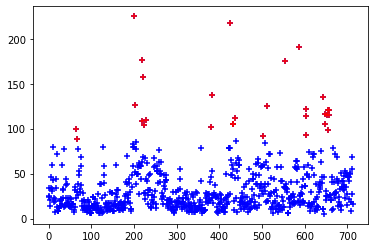

In [114]:
import matplotlib.pyplot as plt
# Nuage de points avec les outliers en rouge

x = general.index.to_list()
y = general["price"]
a = Filter_Zscore.index.to_list()
b = Filter_Zscore["price"]
plt.scatter(x,y, color ='blue', marker='+')
plt.scatter(a,b, color ='red', marker='+')


{'whiskers': [<matplotlib.lines.Line2D at 0x268ec3a38e0>,
 'caps': [<matplotlib.lines.Line2D at 0x268ec3a3f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x268ec3a3730>],
 'medians': [<matplotlib.lines.Line2D at 0x268ec3b1490>],
 'fliers': [<matplotlib.lines.Line2D at 0x268ec3b1760>],
 'means': []}

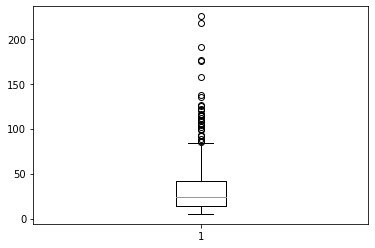

In [115]:
#creation d'un boxplot le fichier general

plt.boxplot(general["price"])


{'whiskers': [<matplotlib.lines.Line2D at 0x268ec400e50>,
 'caps': [<matplotlib.lines.Line2D at 0x268ec40f430>,
 'boxes': [<matplotlib.lines.Line2D at 0x268ec400ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x268ec40f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x268ec40fca0>],
 'means': []}

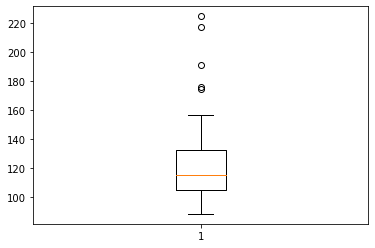

In [116]:
#creation d'un boxplot avec le filtre z

plt.boxplot(Filter_Zscore["price"])
